In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load the dataset
df = pd.read_csv("Cardiotocographic.csv")
#Its shows the first 5 rows 
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [ ]:
......1.Data Cleaning and Preparation.....

In [4]:
#Shows row and columns
df.shape

(2126, 14)

In [5]:
#Shows data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [6]:
# Check data types
df.dtypes

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

In [7]:
# Convert numerical values stored as strings into numeric type
for col in df.select_dtypes(include='object').columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
#pd.to_numeric() tries to change text numbers (e.g "123") into actual numbers (123).
#errors='coerce' means invalid or non-numeric values are replaced with NaN instead of causing an error.

In [8]:
#checking missing values
df.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [9]:
#Handling missing values
df.fillna(df.mean(), inplace=True)                #Replace null values with their respective mean values.
                                                  #Missing numerical values are replaced with the mean to avoid data loss and maintain distribution.
#check if we correctly replaced missing values
df.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [10]:
#To find a mean value for all numerical columns and round off the value with 2decimal using numpy
mean_values = np.round(df.mean(),2)

#To find a median value for all numerical columns and round off the value with 2decimal using numpy
median_values =np.round(df.median(),2)

#To find standard deviation with 2decimals.
std_values =np.round(df.std(),2)

final_df= pd.DataFrame({
    "Mean" : mean_values,
    "Median" :median_values,
    "Std": std_values})
final_df

,Mean,Median,Std
LB,133.34,133.0,11.21
AC,0.00,0.0,0.00
FM,0.01,0.0,0.07
UC,0.00,0.0,0.00
DL,0.00,0.0,0.00
DS,0.00,0.0,0.00
DP,0.00,0.0,0.00
ASTV,47.00,49.0,18.81
MSTV,1.36,1.2,1.17
ALTV,10.29,0.0,21.21


In [11]:
#Treat outlier
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR_df = pd.DataFrame({
    "Q1": Q1,
    "Q3":Q3,
    "IQR":IQR})
IQR_df

,Q1,Q3,IQR
LB,126.000000,140.000000,14.000000
AC,0.000000,0.005606,0.005606
FM,0.000000,0.002567,0.002567
UC,0.001851,0.006536,0.004685
DL,0.000000,0.003289,0.003289
DS,0.000000,0.000000,0.000000
DP,0.000000,0.000000,0.000000
ASTV,32.000000,61.000000,29.000000
MSTV,0.700000,1.700000,1.000000
ALTV,0.000000,11.000000,11.000000


In [12]:
#Find no of outliers
outliers_before = ((df < (Q1 - 1.5 * IQR)) | 
                   (df > (Q3 + 1.5 * IQR))).any(axis=1)

print("No of Outlier before:",outliers_before.sum())

#1243 outliers is present ,so removing outliers is not good,we need to replace the outliers with respective limits.

No of Outlier before: 1243


In [13]:
#Replace outliers with their upper or lower limit
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replaces outliers by capping values within the calculated lower and upper bounds for each column
df = df.clip(lower=lower_bound, upper=upper_bound, axis=1) 



In [14]:
#Checking outliers is correctly replaced or not by sum of all outliers.
outliers_after = ((df < (Q1 - 1.5 * IQR)) | 
                   (df > (Q3 + 1.5 * IQR))).any(axis=1)

print("No of Outlier after:",outliers_after.sum()) #zero outliers indicates correctly replaced values 


No of Outlier after: 0


In [ ]:
.......2.Statistical Summary.......

In [ ]:
1. Mean and median values of most variables are close, indicating relatively symmetric distributions.
2. Some variables show high standard deviation, suggesting wide variability in the data.
3. Large IQR values in variability-related features indicate the presence of significant dispersion.
4. A few variables have extreme minimum or maximum values, hinting at possible outliers.
5. In this dataset has more outliers so its should be treated with replacing lower or upper limit which is closer to outliers.

In [ ]:
.....3.Data Visualization......

In [ ]:
A.Histogram
       A histogram shows how numerical (continuous) data is distributed.A histogram displays the frequency of numerical data.

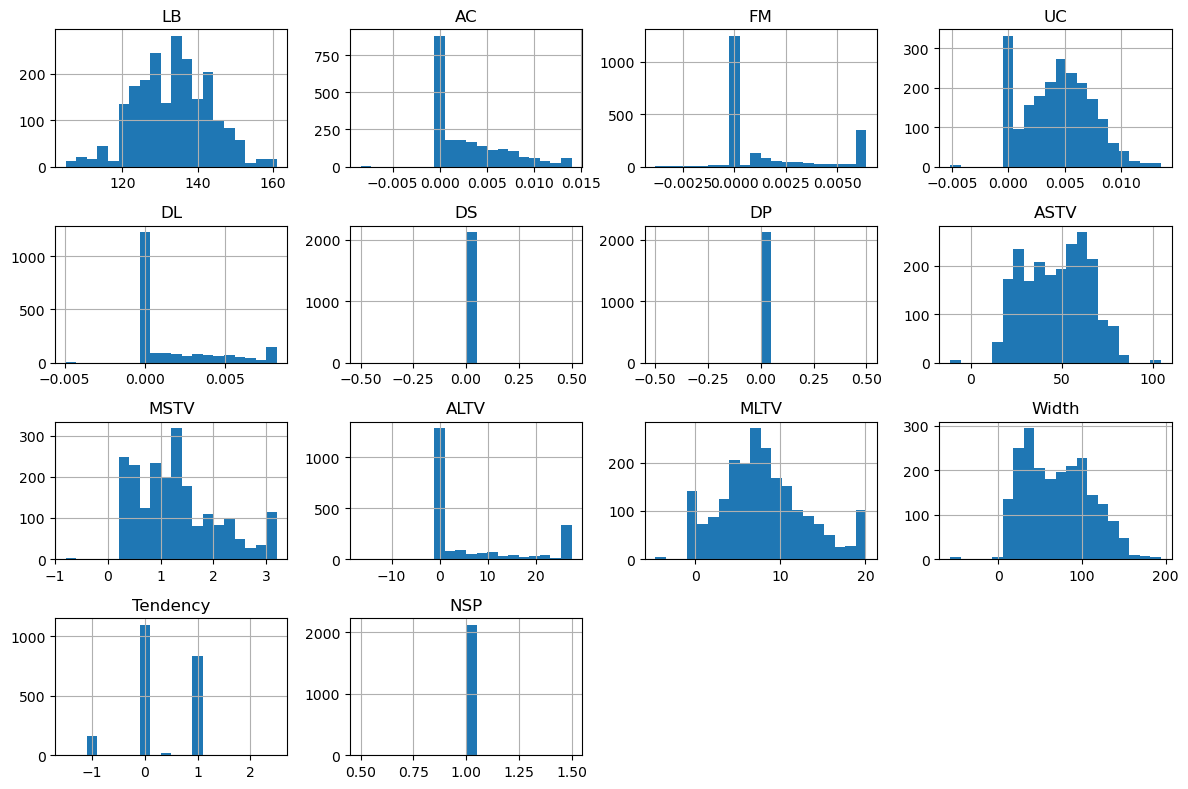

In [15]:
#Histogram
df.hist(bins=20, figsize=(12,8))
plt.tight_layout()
plt.show()

In [ ]:
Histogram Interpretations:

1. LB (Baseline Fetal Heart Rate)
  *The distribution is approximately normal.
  *Most values lie between 120 and 140 bpm, indicating normal fetal heart rate.
  *low outlier presence.

2. AC (Accelerations)
  *Data is highly right-skewed.
  *Majority of values are close to zero, indicating few accelerations.
  *Few higher values suggest occasional acceleration events.

3. FM (Fetal Movements)
  *Strong right skewness with a high peak near zero.
  *Most observations show low fetal movement counts.
  *A small number of cases have higher movement activity.

4. UC (Uterine Contractions)
  *Distribution is slightly right-skewed.
  *Most values cluster between 0 and 0.01, indicating mild contractions.
  *Few higher values may represent stronger contraction episodes.

5. DL (Late Decelerations)
  *Highly skewed distribution.
  *Majority of values are near zero, meaning late decelerations are rare.
  *Occasional higher values indicate abnormal fetal conditions.

6. DS (Short Decelerations)
  *Strong peak at zero, showing very few short decelerations.
  *Almost no spread → mostly absence of DS events.

7. DP (Prolonged Decelerations)
  *Data is concentrated around zero.
  *Indicates prolonged decelerations are rare occurrences.
  *Very limited variability.

8. ASTV (Abnormal Short-Term Variability %)
  *Distribution is moderately spread.
  *Most values range between 20% and 70%.
  *Indicates varying degrees of abnormal short-term variability.

9. MSTV (Mean Short-Term Variability)
  *Slight right-skewed distribution.
  *Most values fall between 0.5 and 2.5.
  *Higher values suggest healthier fetal heart variability.

10. ALTV (Abnormal Long-Term Variability %)
  *Highly right-skewed.
  *Majority of values are near zero, indicating normal long-term variability.
  *Few extreme values indicate abnormal cases.

11. MLTV (Mean Long-Term Variability)
  *Approximately normal distribution.
  *Values mainly between 5 and 15.
  *Suggests stable long-term fetal heart variability.

12. Width
  *Distribution is slightly right-skewed.
  *Most values lie between 20 and 120.
  *Indicates variation in fetal heart rate signal width

13.Tendency
   *Distribution shows distinct spikes at discrete values (approximately −1, 0, and 1).
   *This indicates that Tendency is a categorical or encoded variable, not a continuous one.
   *Most observations fall around 0 and 1, suggesting neutral to positive trends dominate.

14.NSP (Fetal State Classification)
   *Distribution is highly concentrated around the value 1.
   *This shows that the dataset is class-imbalanced, with most cases belonging to class 1.
   *Very few observations appear in other classes (e.g., 2 or 3, if present).

In [ ]:
B.Bar charts or Pie chart
   There is no categorical variable in this dataset. All values are numerical columns only found. So bar chart and Pie chart cannot be performed in this operation

In [ ]:
C.Scatter plot
  Scatter plots are used to visualize the relationship, trend, or correlation between two numerical variables.

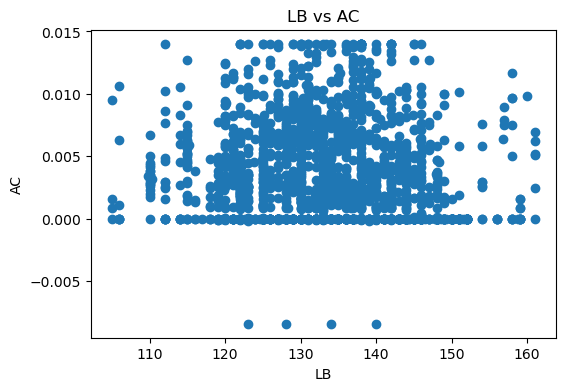

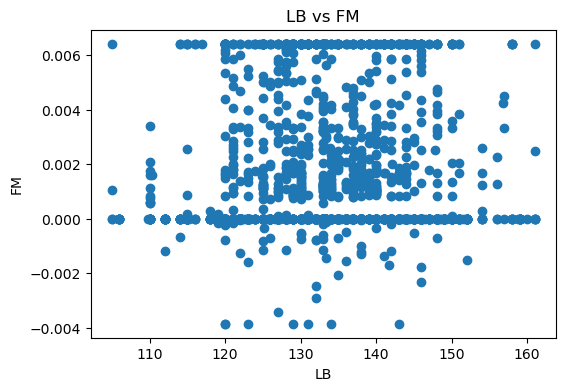

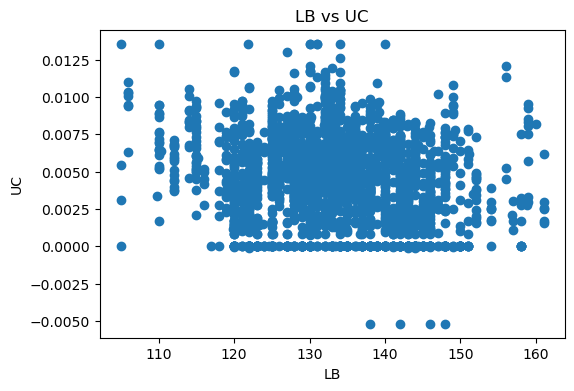

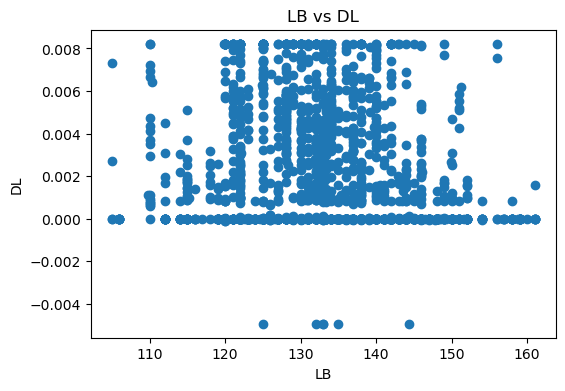

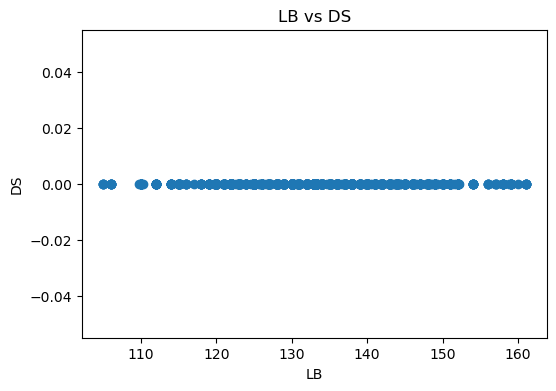

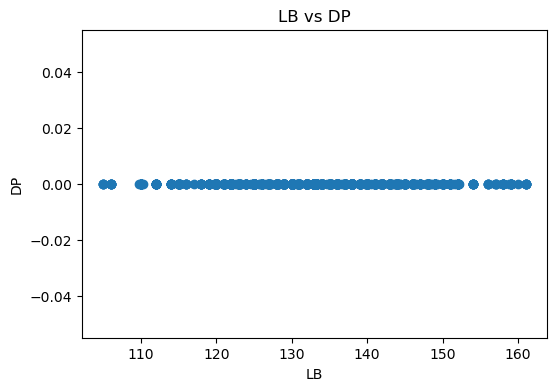

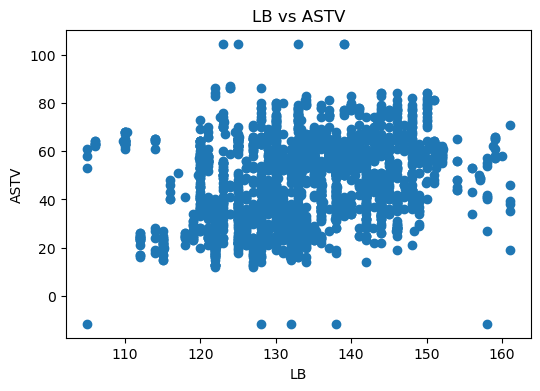

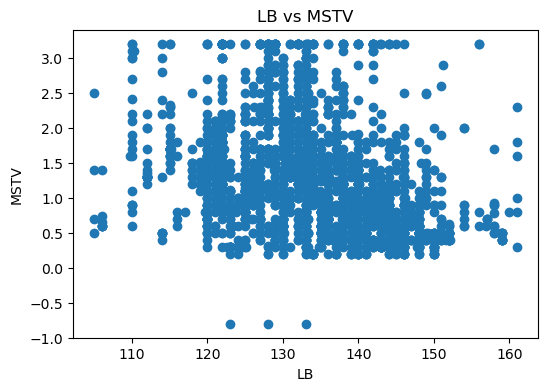

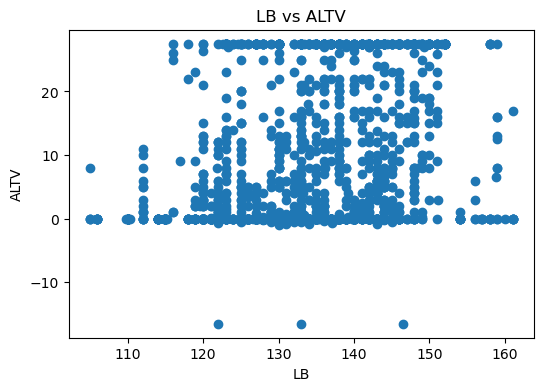

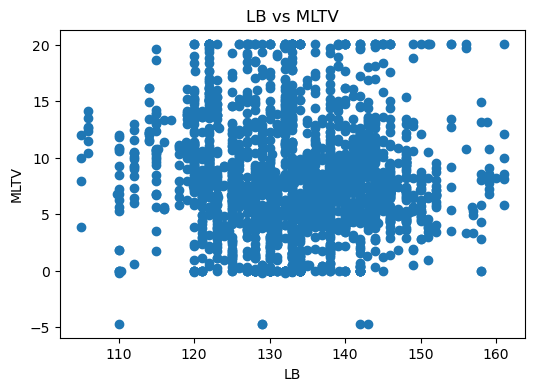

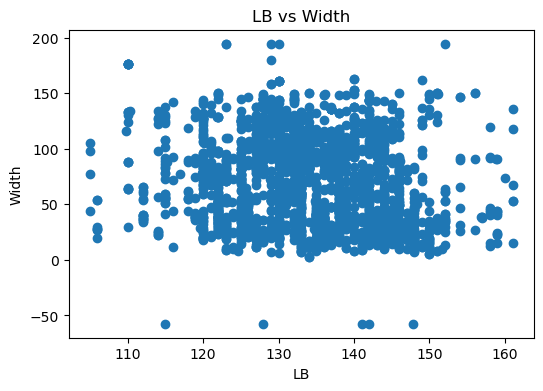

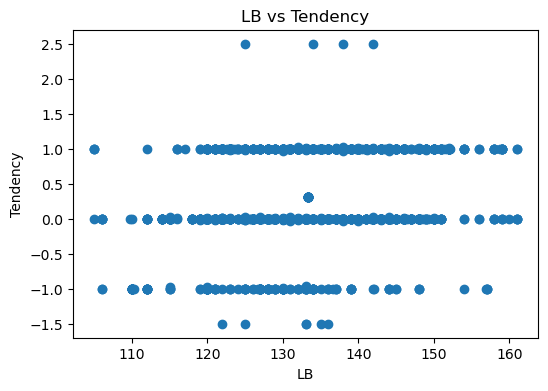

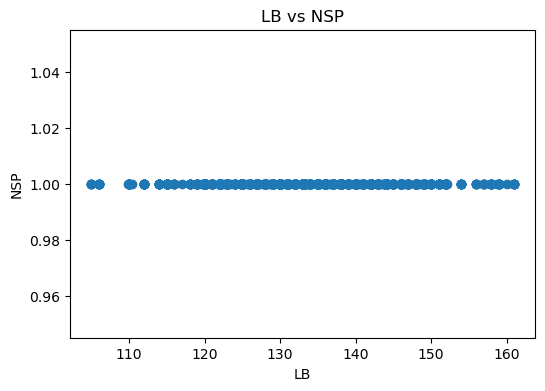

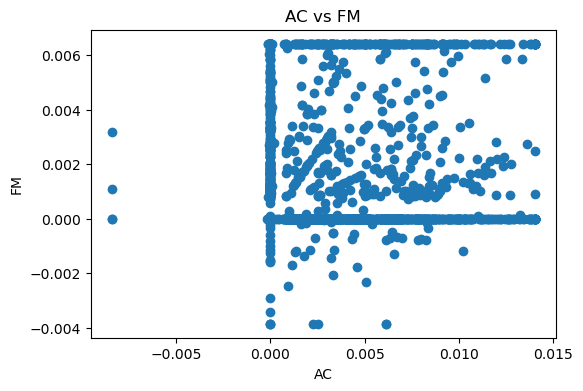

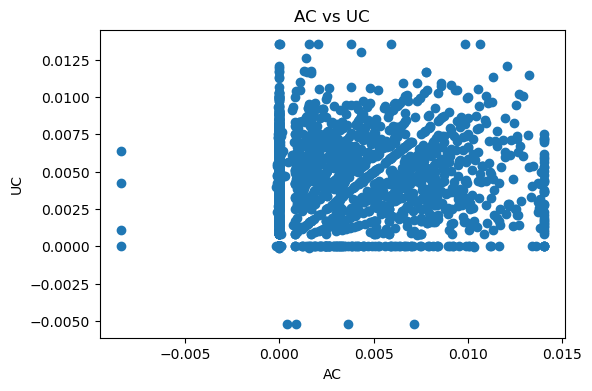

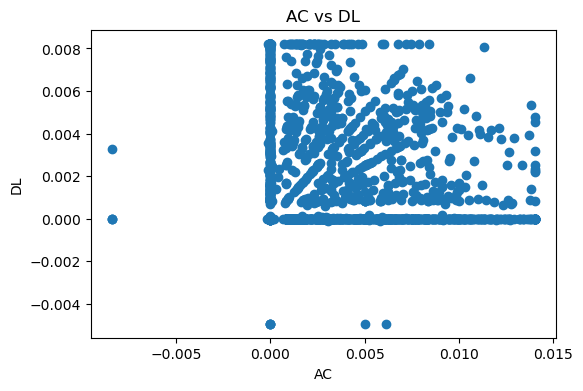

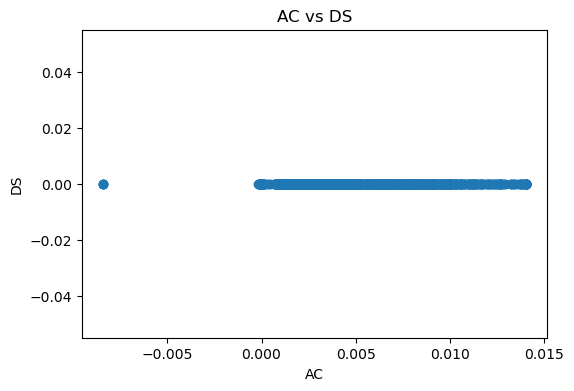

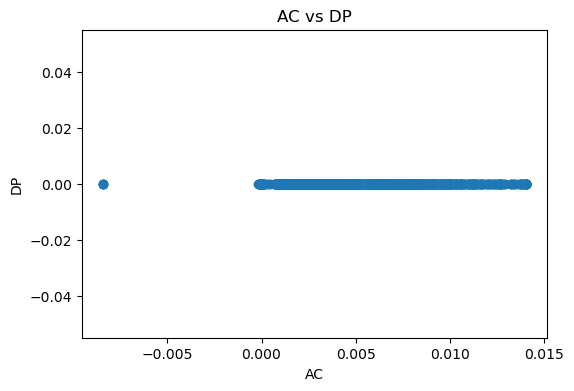

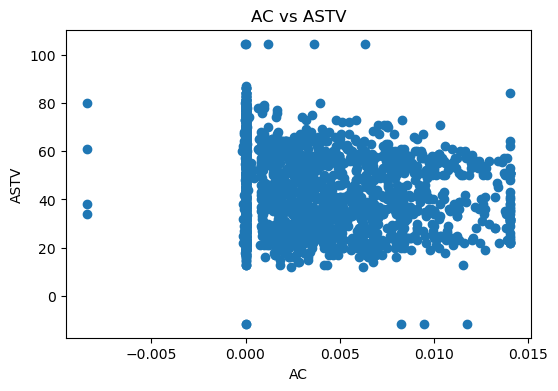

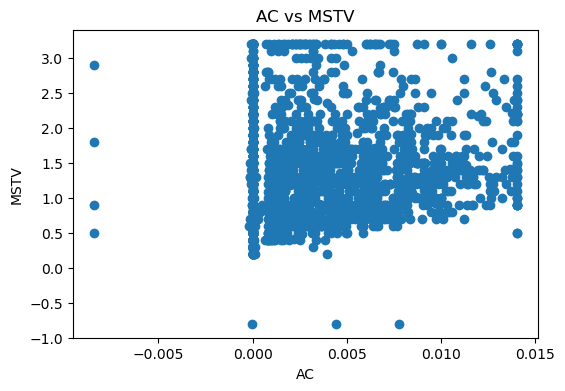

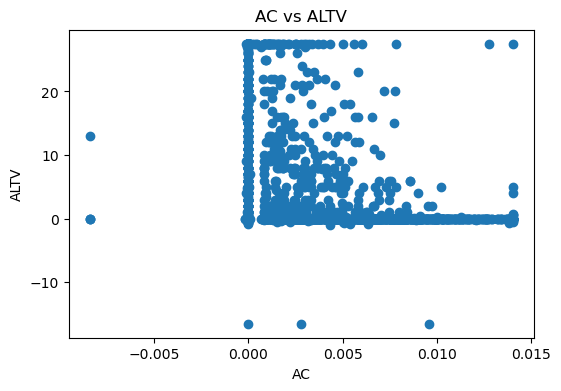

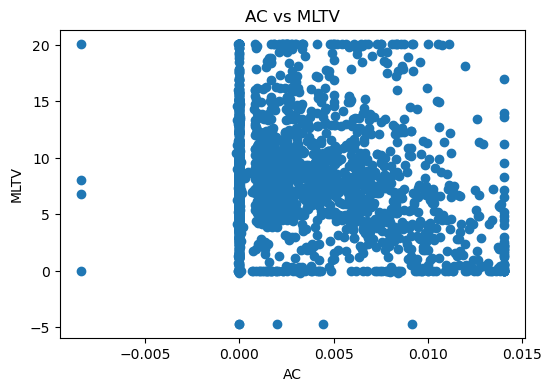

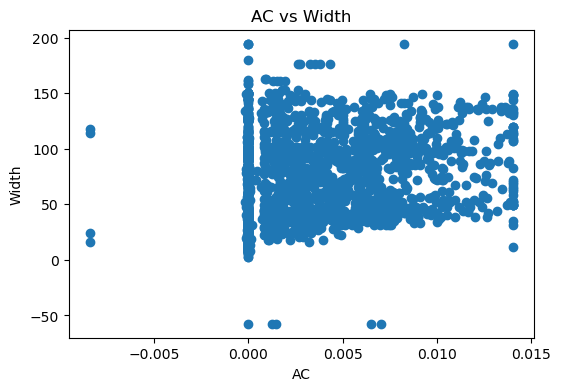

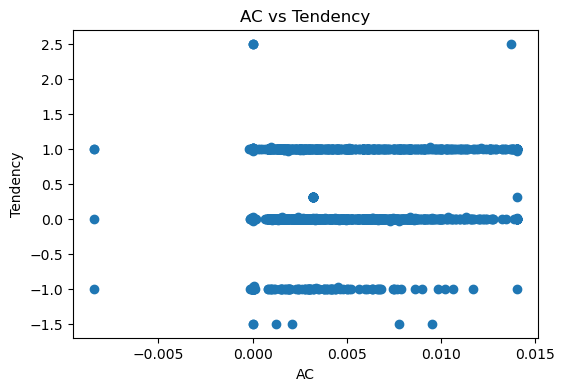

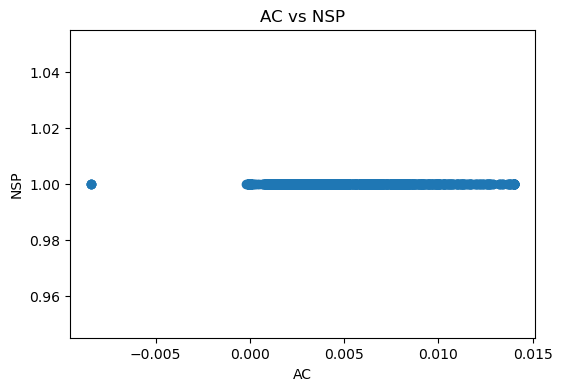

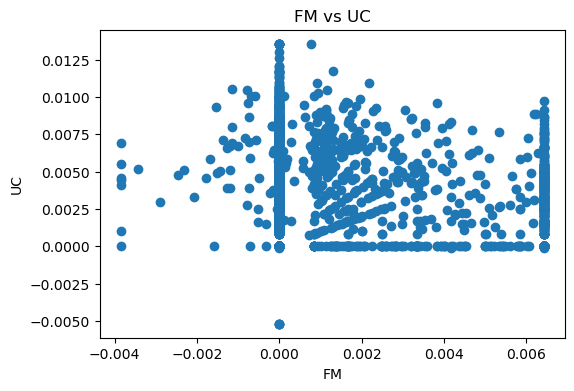

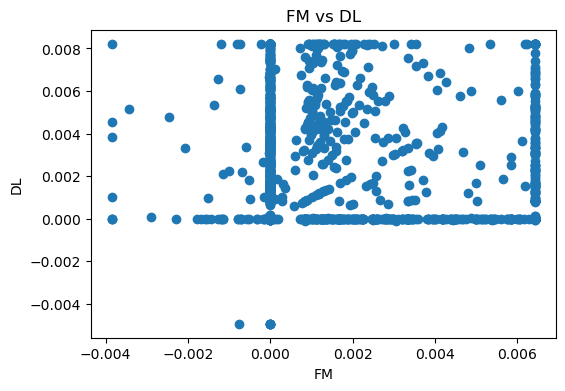

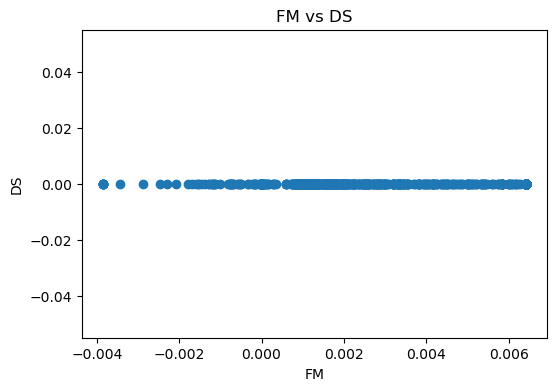

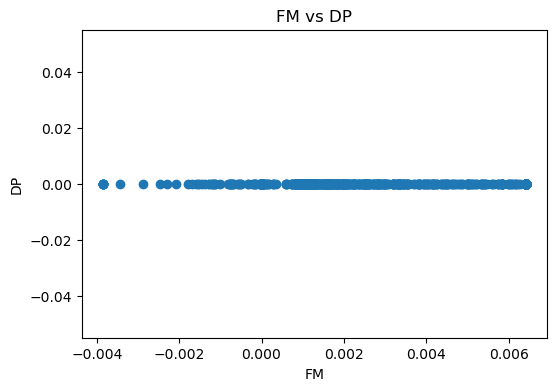

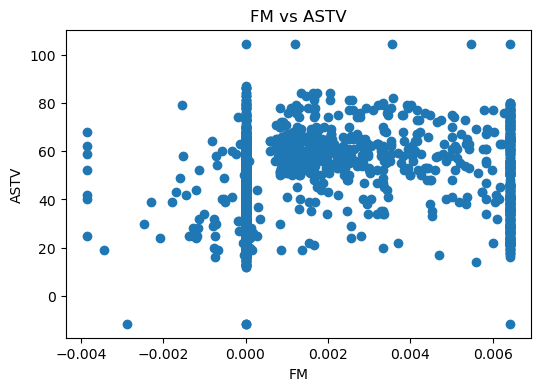

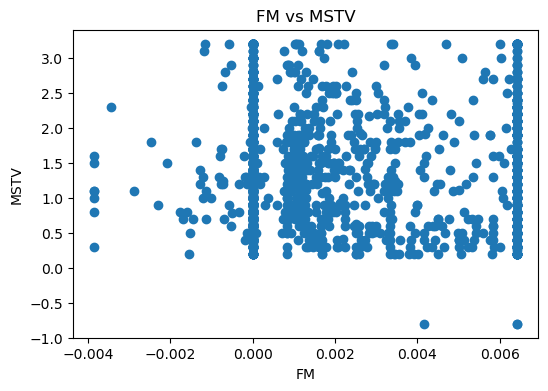

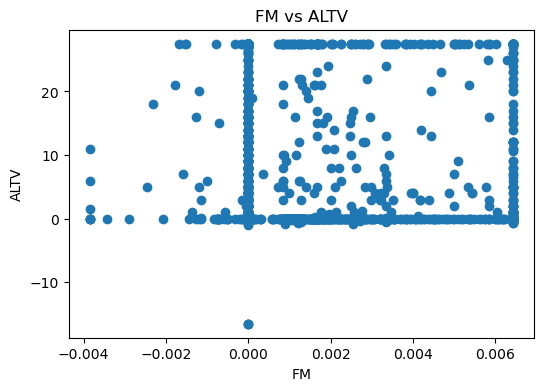

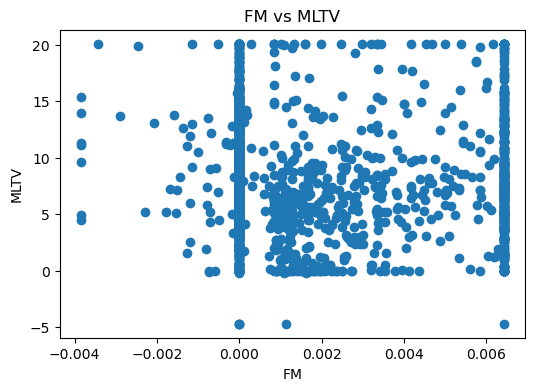

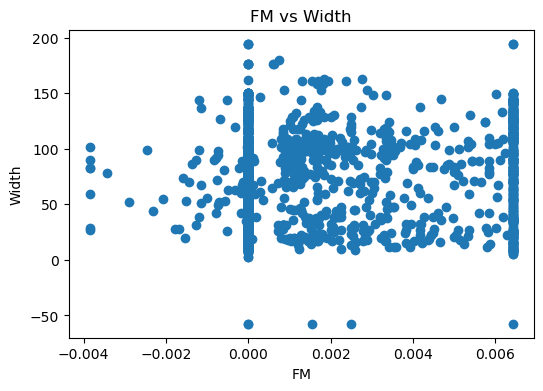

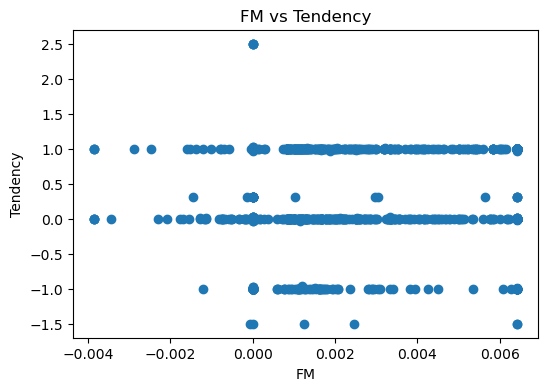

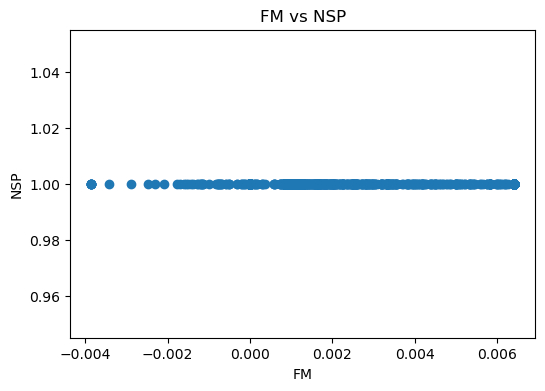

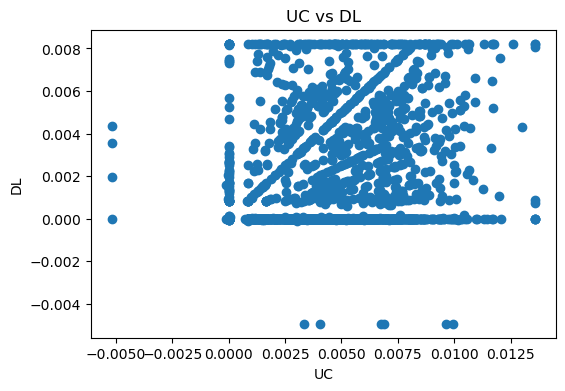

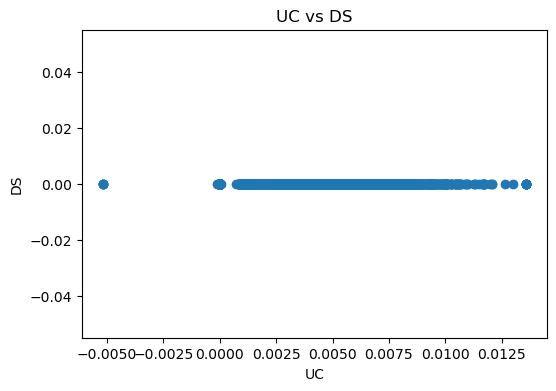

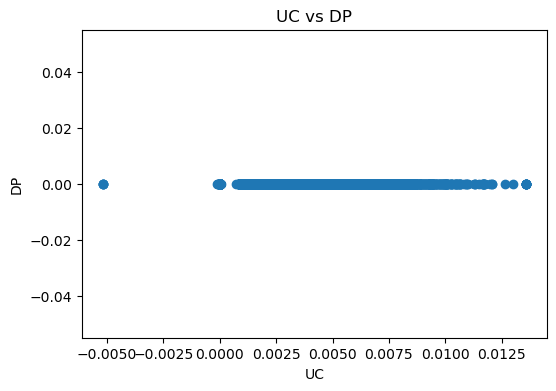

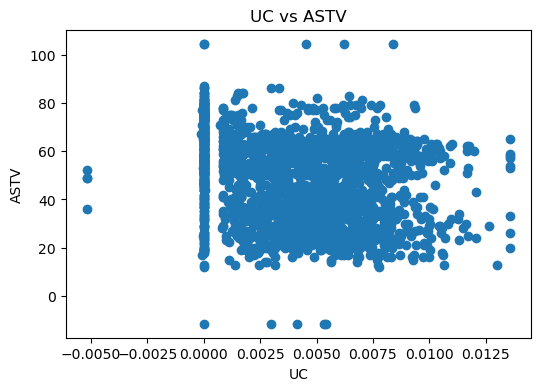

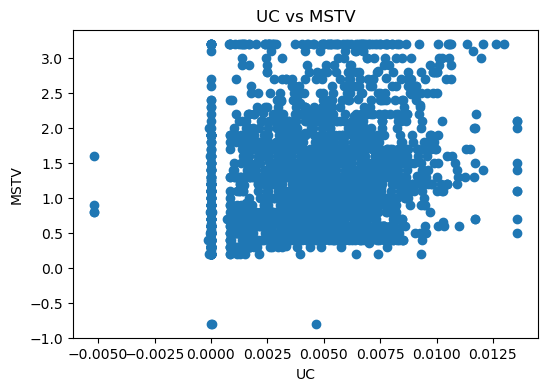

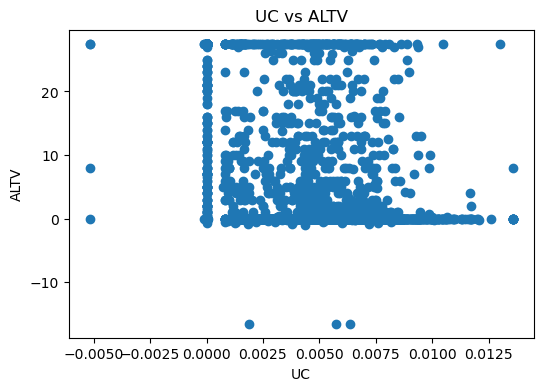

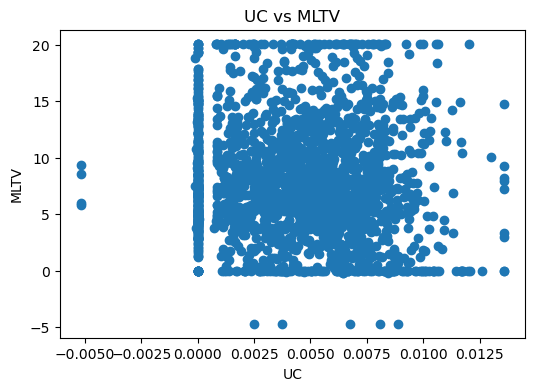

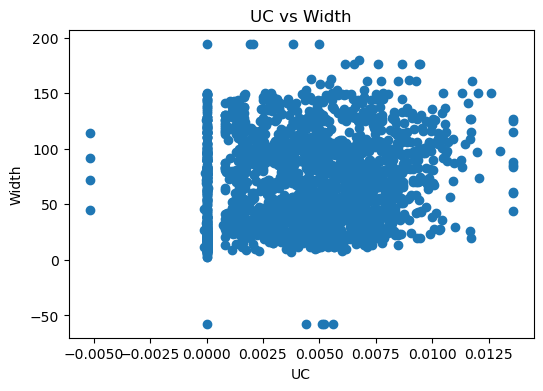

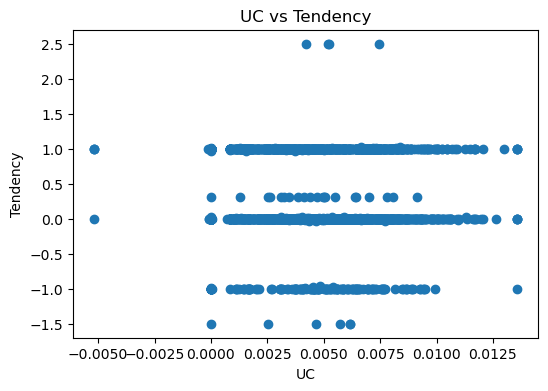

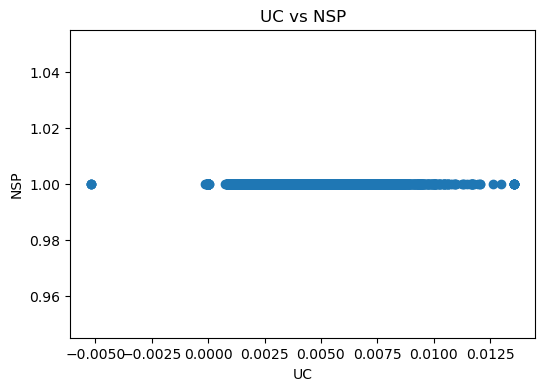

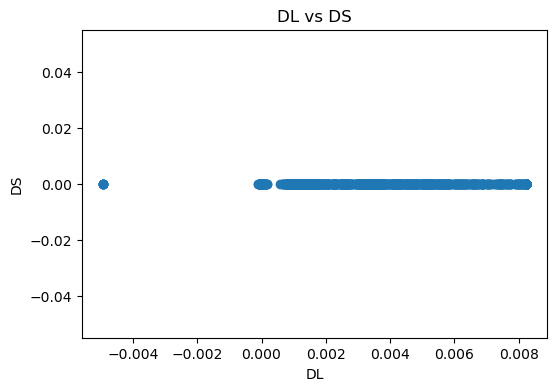

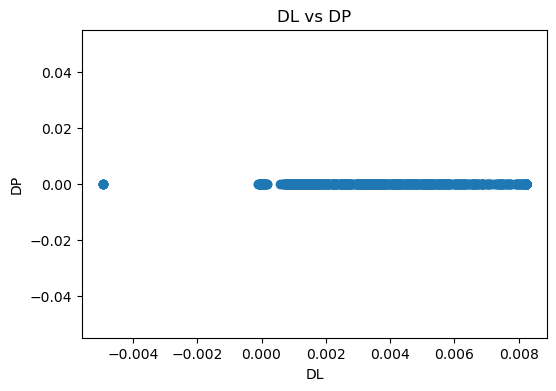

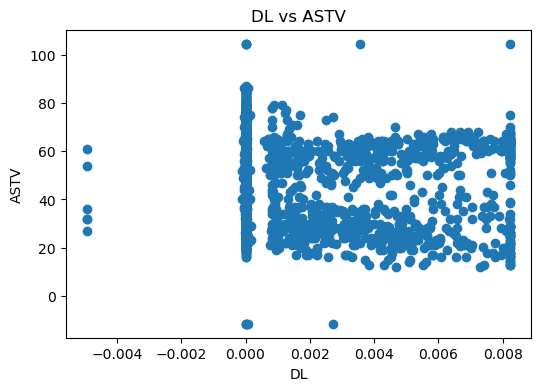

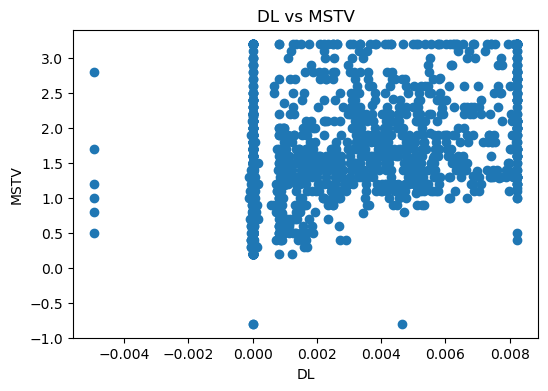

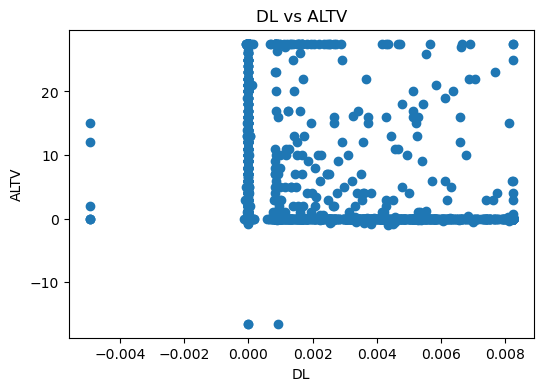

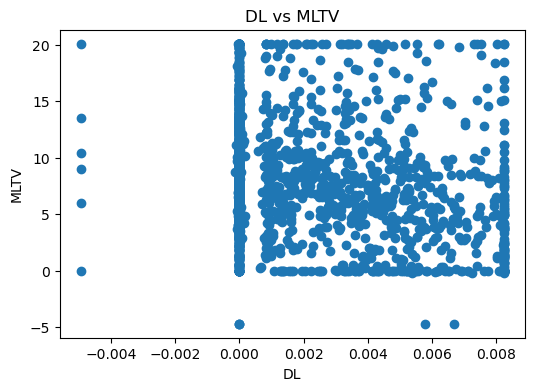

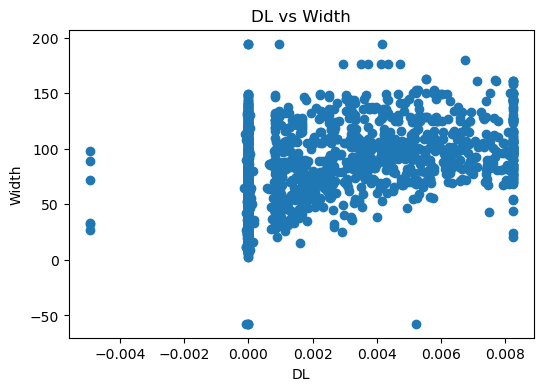

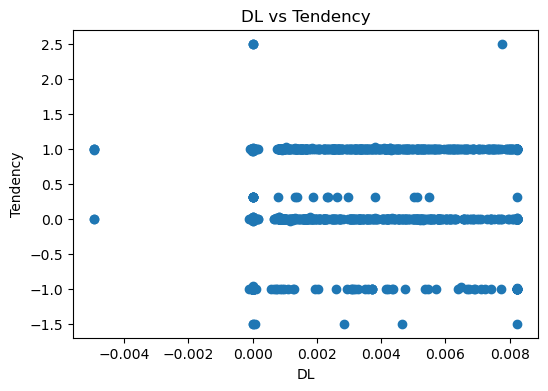

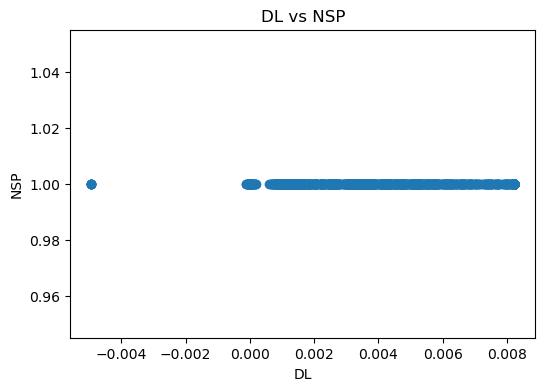

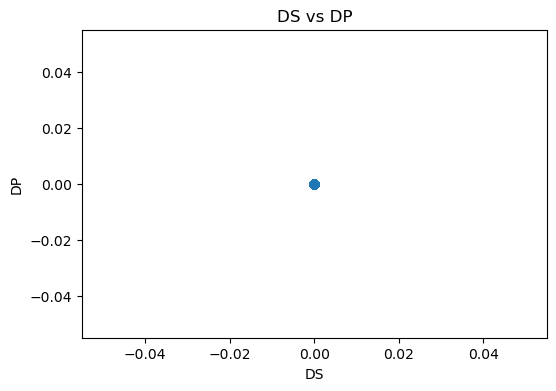

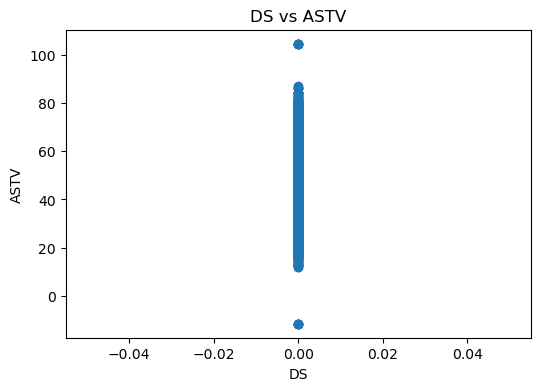

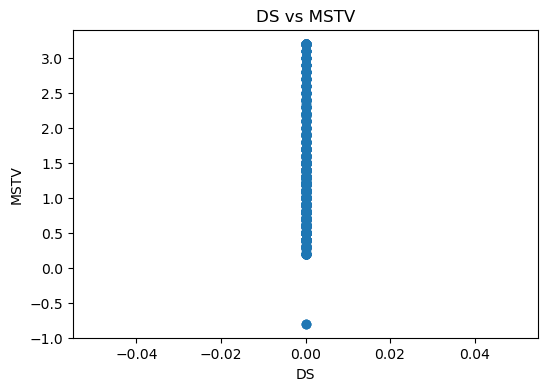

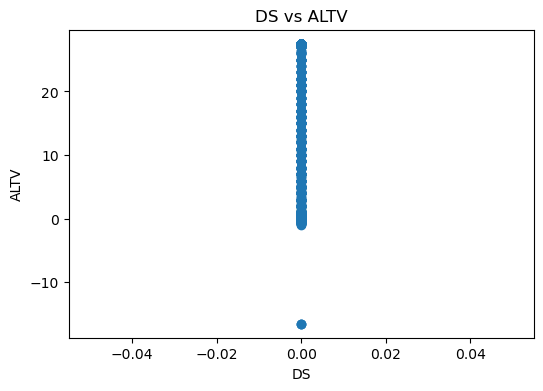

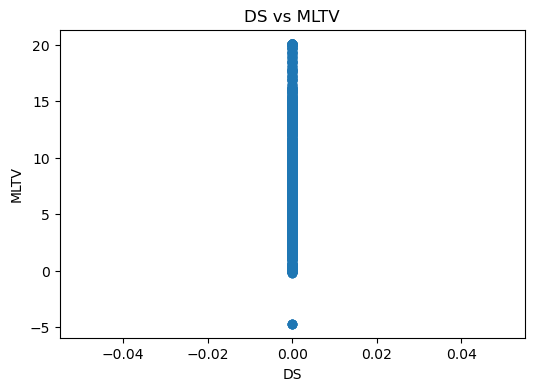

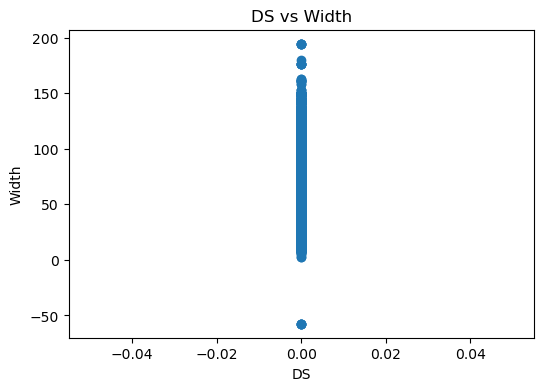

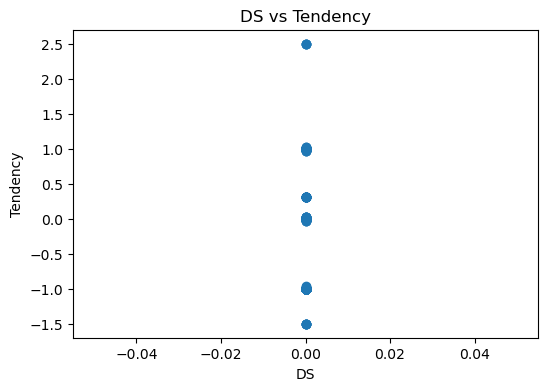

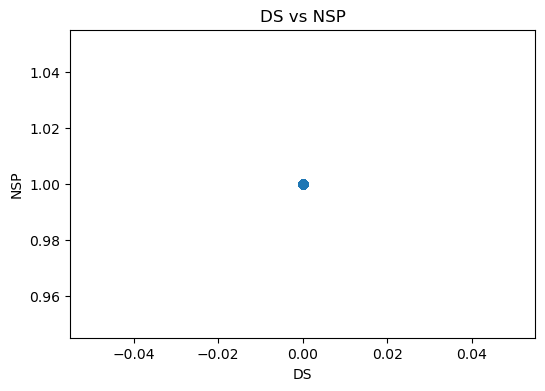

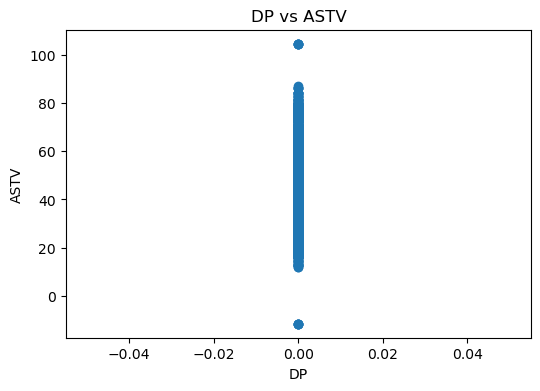

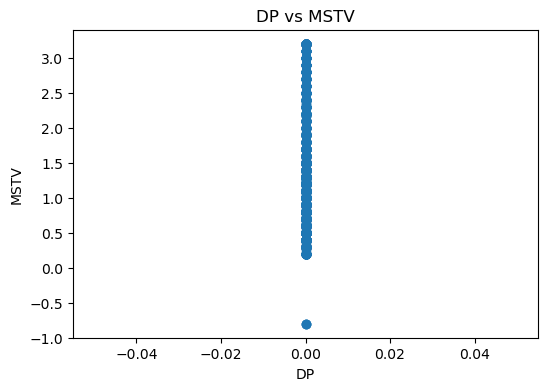

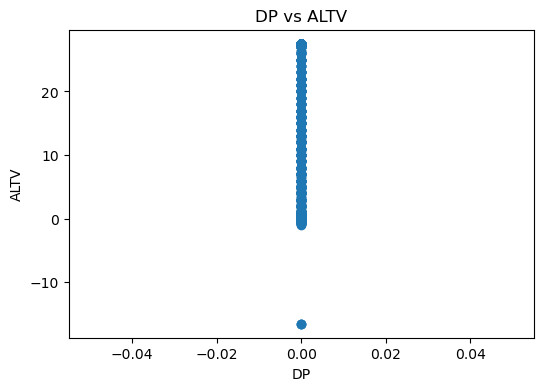

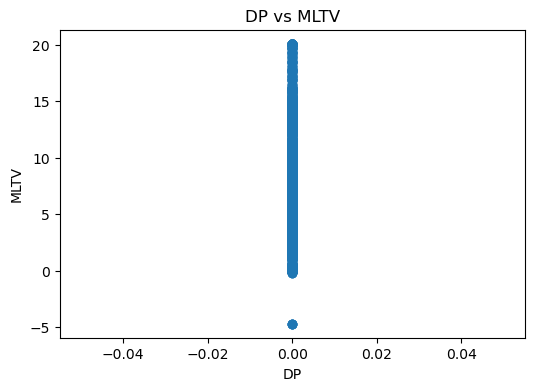

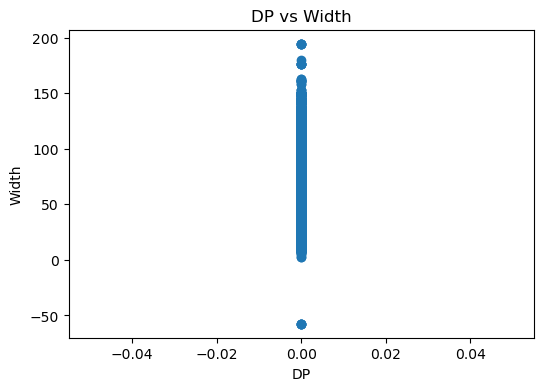

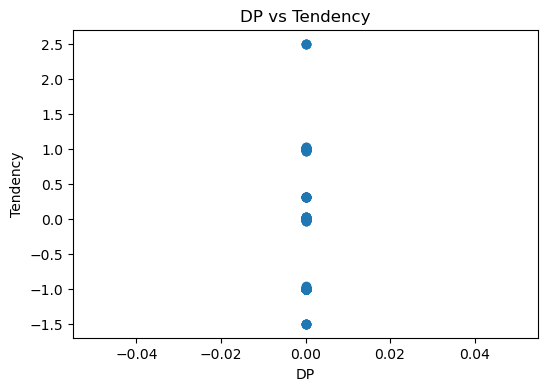

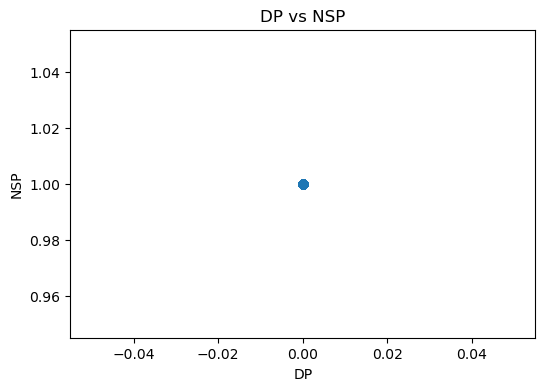

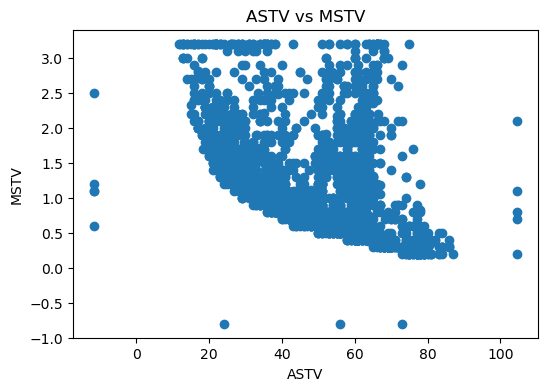

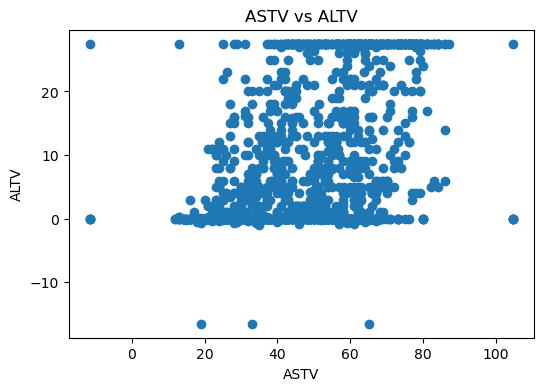

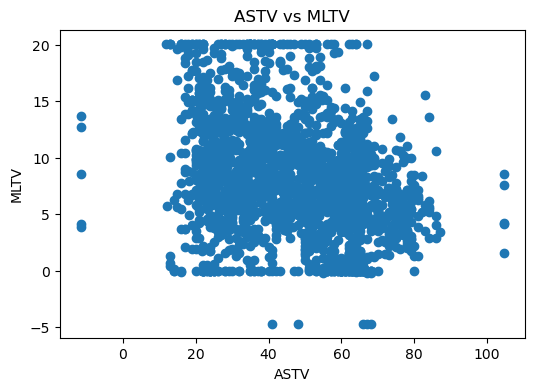

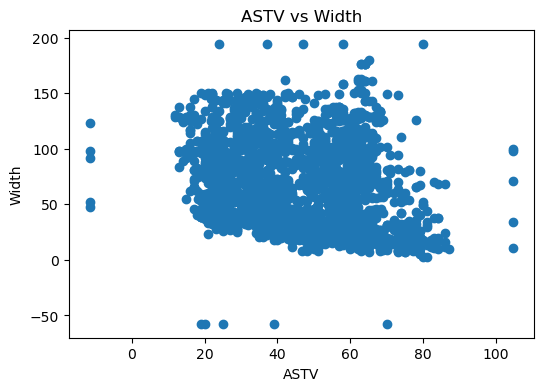

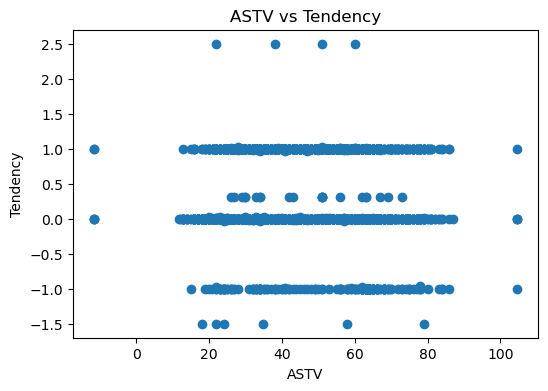

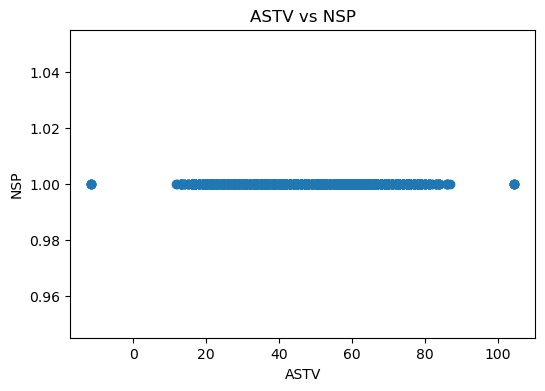

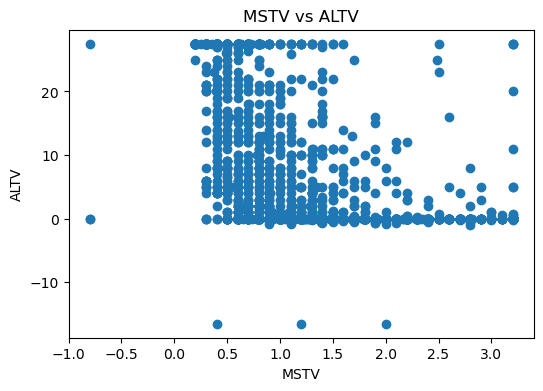

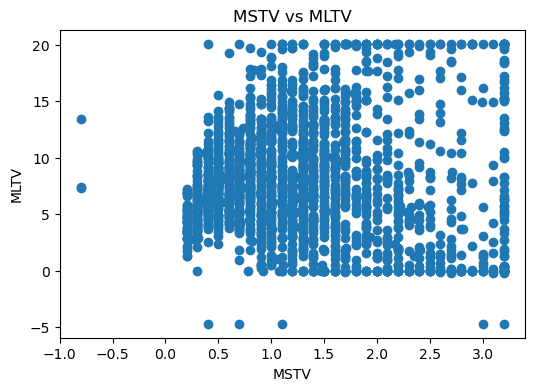

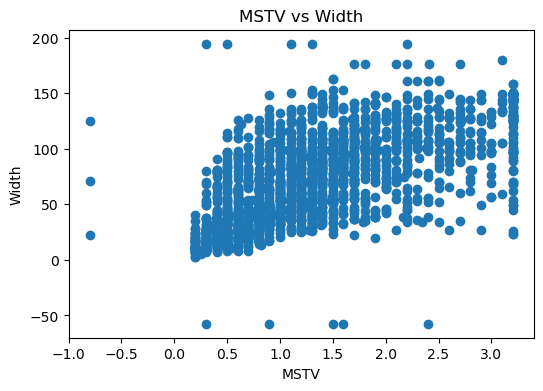

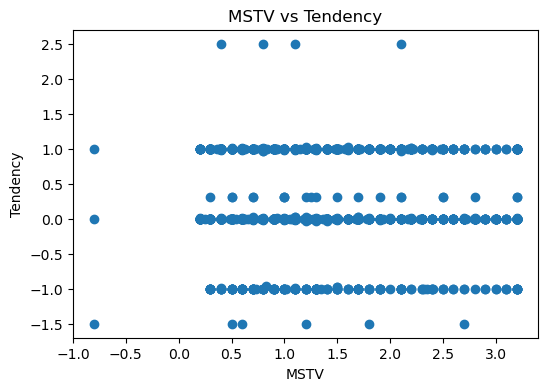

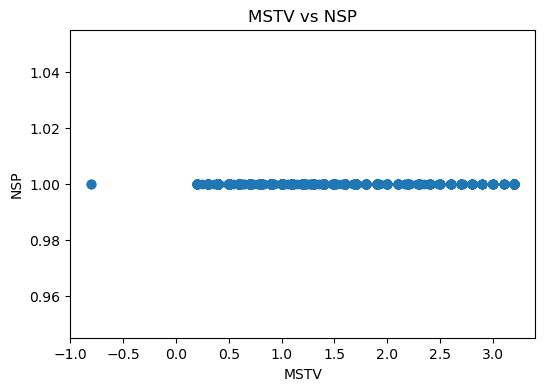

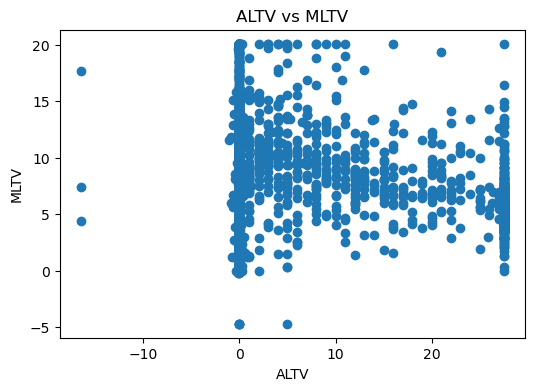

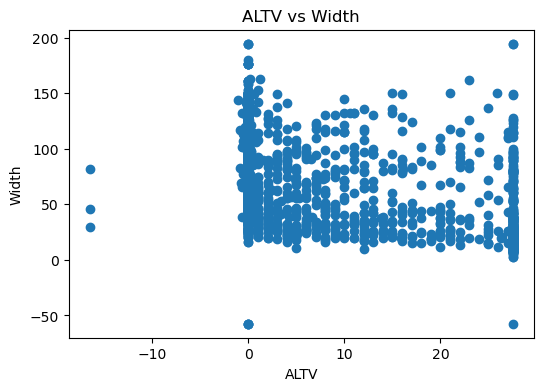

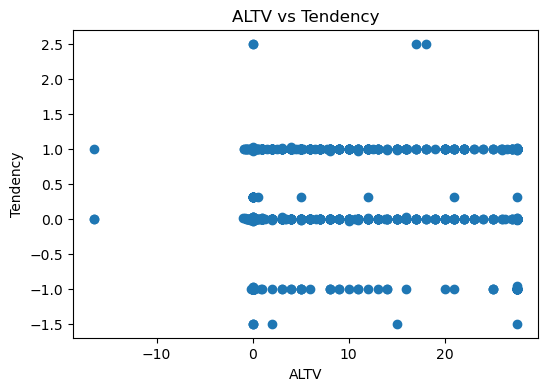

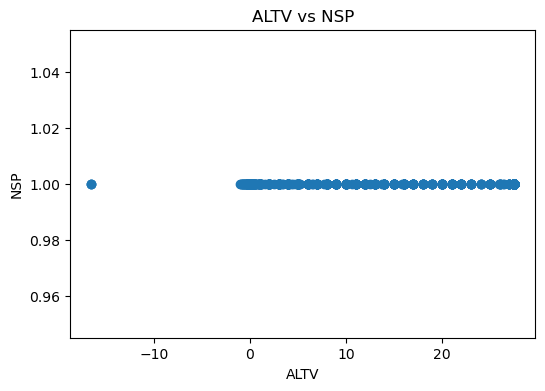

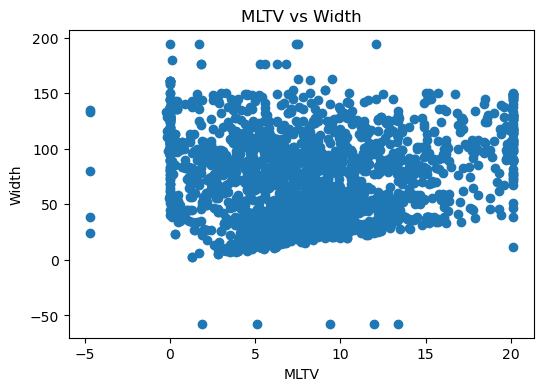

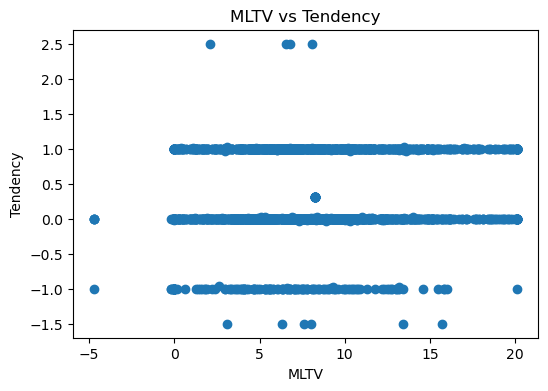

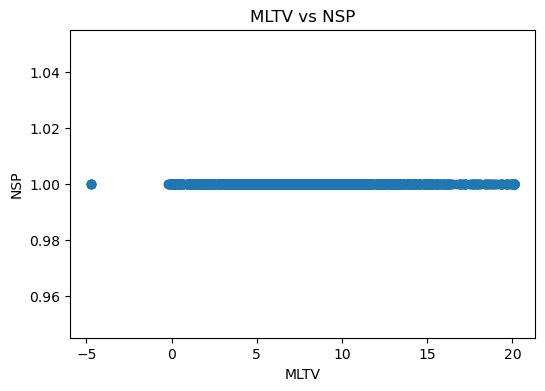

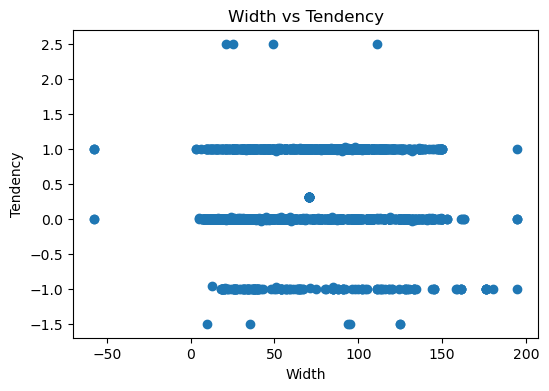

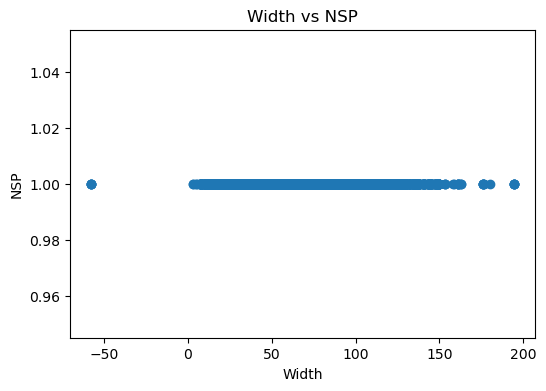

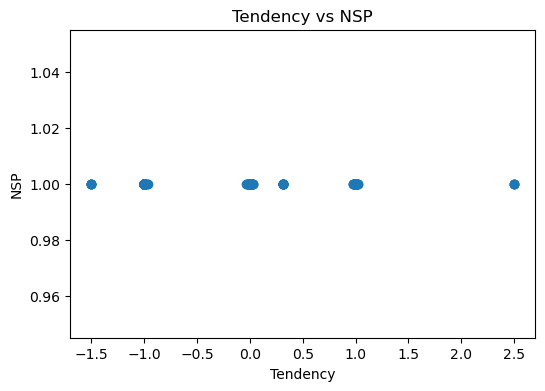

In [21]:
numerical_columns = df.select_dtypes(include='number').columns

for i in range(len(numerical_columns)):
    for j in range(i+1, len(numerical_columns)):
        plt.figure(figsize=(6,4))
        plt.scatter(df[numerical_columns[i]], df[numerical_columns[j]])
        plt.xlabel(numerical_columns[i])
        plt.ylabel(numerical_columns[j])
        plt.title(f'{numerical_columns[i]} vs {numerical_columns[j]}')
        plt.show()


In [ ]:
D. Violin plot
 To compare distribution, spread, and density across multiple numerical columns.

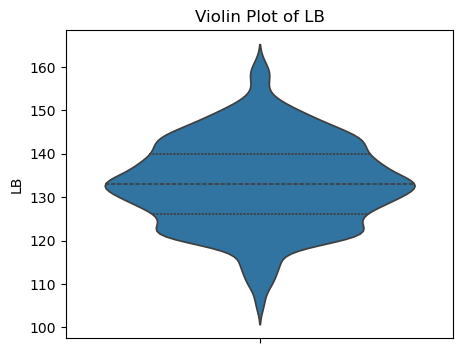

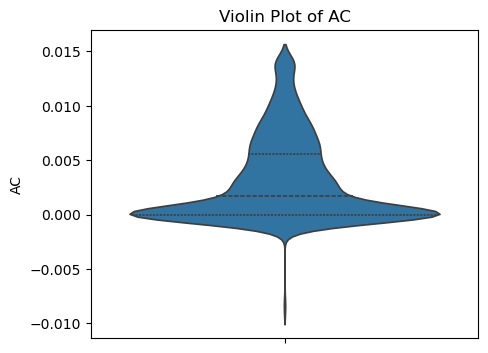

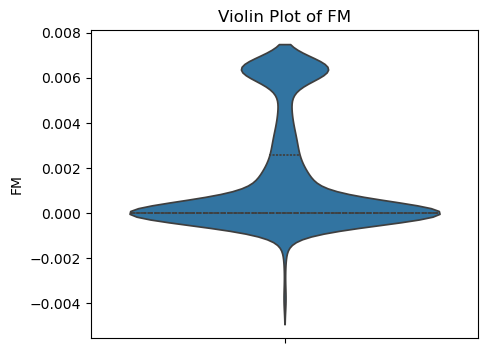

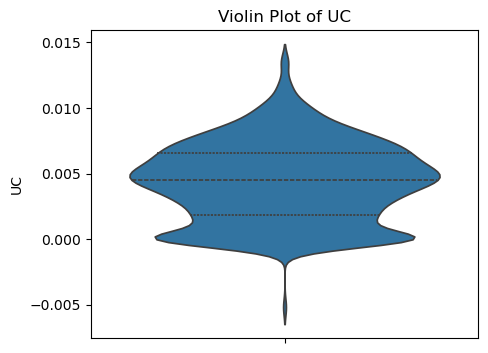

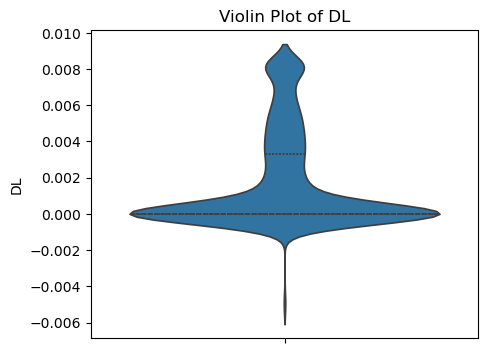

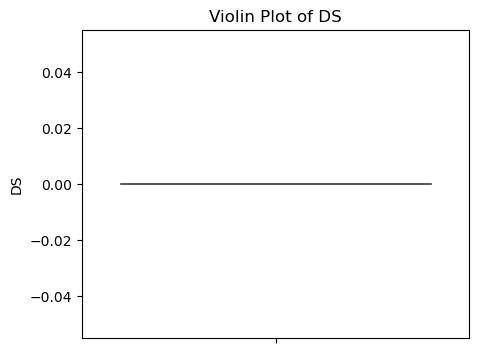

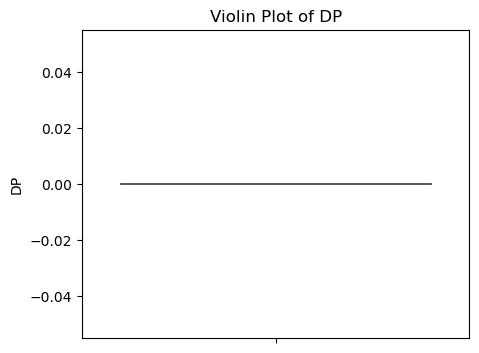

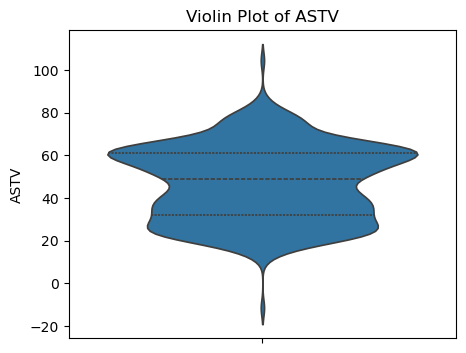

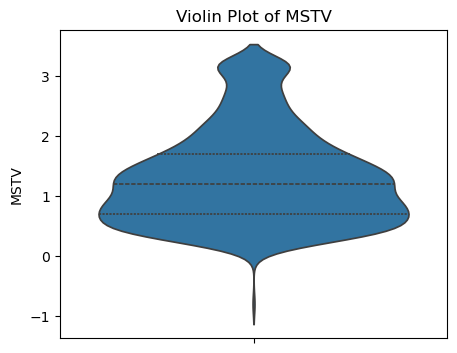

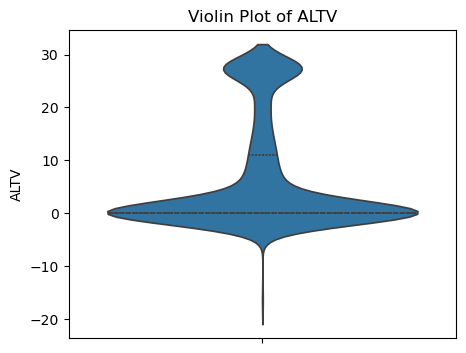

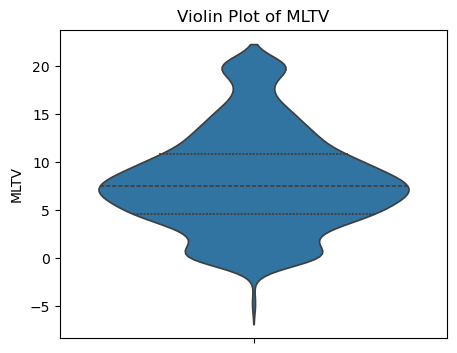

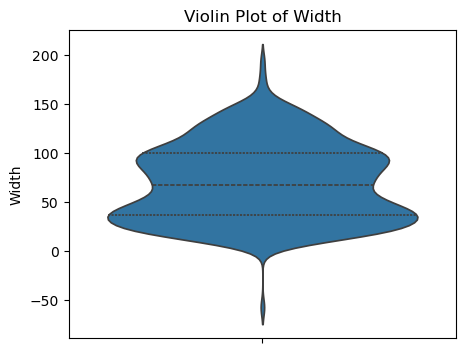

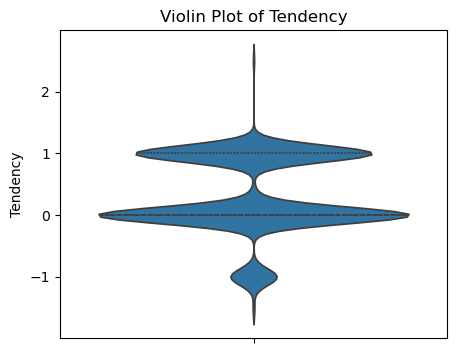

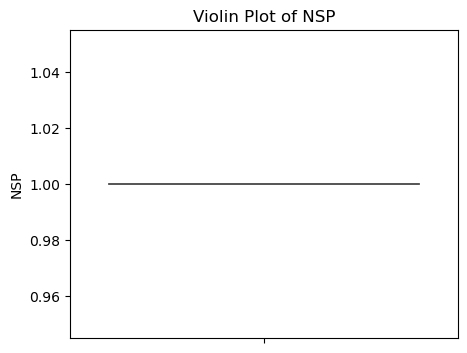

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
numerical_columns = df.select_dtypes(include='number').columns

# Create violin plot for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(5,4))
    sns.violinplot(y=df[col], inner='quartile')
    plt.title(f'Violin Plot of {col}')
    plt.show()


In [ ]:
4. Pattern Recognition and Insights

In [37]:
#correlation between variables
correlation_matrix = df.corr()
correlation_matrix


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.000000,-0.080880,-0.006904,-0.162773,-0.156224,NaN,NaN,0.285623,-0.295485,0.322315,-0.042613,-0.140044,0.281012,NaN
AC,-0.080880,1.000000,0.076151,0.093970,-0.102722,NaN,NaN,-0.272436,0.217447,-0.409592,-0.152335,0.283773,0.029403,NaN
FM,-0.006904,0.076151,1.000000,-0.317265,-0.017610,NaN,NaN,0.156351,0.070300,-0.013420,-0.036875,0.164648,0.000980,NaN
UC,-0.162773,0.093970,-0.317265,1.000000,0.268605,NaN,NaN,-0.215984,0.297843,-0.293340,-0.074002,0.131802,-0.073700,NaN
DL,-0.156224,-0.102722,-0.017610,0.268605,1.000000,NaN,NaN,-0.111624,0.566340,-0.295886,-0.242556,0.514648,0.014969,NaN
DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ASTV,0.285623,-0.272436,0.156351,-0.215984,-0.111624,NaN,NaN,1.000000,-0.433844,0.439040,-0.324728,-0.241131,-0.009789,NaN
MSTV,-0.295485,0.217447,0.070300,0.297843,0.566340,NaN,NaN,-0.433844,1.000000,-0.541156,0.011692,0.646056,-0.063114,NaN
ALTV,0.322315,-0.409592,-0.013420,-0.293340,-0.295886,NaN,NaN,0.439040,-0.541156,1.000000,-0.133670,-0.439168,0.050845,NaN


In [ ]:
Key Correlation Insights:

* Baseline Fetal Heart Rate (LB) shows moderate correlation with variability measures (MSTV, MLTV),
  indicating that heart rate and variability are physiologically related.

* Variability features (ASTV, MSTV, ALTV, MLTV) are interrelated, suggesting they collectively
  represent fetal autonomic nervous system activity.

* Deceleration variables (DL, DS, DP) show strong mutual correlation and are mostly zero-inflated,
  indicating that such abnormal events are rare but related when they occur.

* Uterine Contractions (UC) show mild association with deceleration features,
  implying contractions may influence fetal heart rate patterns.

* NSP (fetal state classification) correlates with variability and deceleration features,
  highlighting their importance in fetal health assessment.
      
Temporal Trends:
  *The dataset does not contain explicit time or date variables.

  *Therefore, temporal trend analysis could not be performed.

  *However, event-based patterns were observed through variability and deceleration measures.


In [ ]:
Key Insights from EDA:

* Most variables related to fetal heart rate variability follow near-normal distributions,
  while deceleration-related variables are highly skewed with many zero values.

* Outliers were present in several variables and were successfully treated using IQR capping,
  improving data consistency without losing observations.

* Strong relationships exist among variability-related features, indicating their collective
  role in assessing fetal well-being.

* Class imbalance was observed in NSP, with most cases classified as normal,
  which should be considered in predictive modeling.


In [ ]:
Impact on Decision-Making and Further Analysis:

* Identified correlations help clinicians and analysts focus on key indicators such as
  variability and deceleration features for fetal health assessment.

* Outlier treatment improves model stability and statistical reliability.

* Class imbalance in NSP suggests the need for resampling techniques
  in machine learning models.

* Findings support further predictive modeling and classification tasks
  to assist in early detection of fetal distress.


In [ ]:
Conclusion:

   *EDA highlights key distributions, correlations, and data quality improvements that guide informed decision-making.
       
   *These insights enhance understanding of fetal health indicators and provide a strong foundation for further statistical analysis and predictive
modeling